In [26]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score


np.random.seed(42)


# Exercise-1

## 1.1 Data Exploration

### Q1.1.1

In [2]:
#Importing the dataset as a dataframe object

df=pd.read_csv("WineQT.csv")

In [3]:
#Shows the fist five rows

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
#gives the info of the dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
#gives the summary of the statestic

df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


total sulfur dioxide er det høyeste på 32.78 vis man ser bort i fra id om bare er en identifisering

## 1.2 Correlation Analysis

In [6]:

corr = df.corr(numeric_only=True)  
corr 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


### Q1.2.2

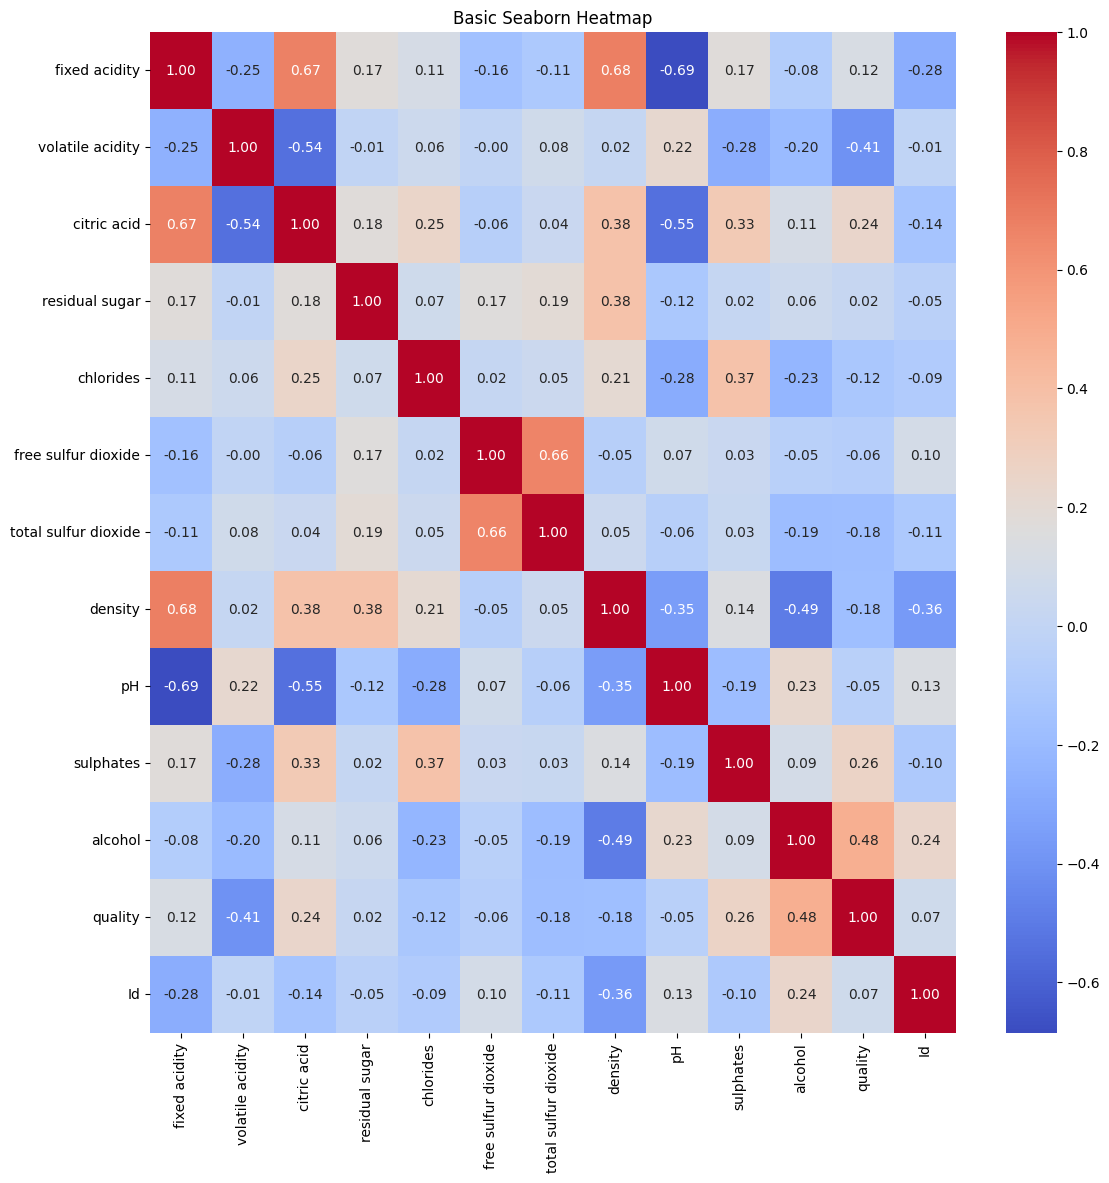

In [7]:
plt.figure(figsize=(13, 13))
sns.heatmap(corr, annot=True, fmt='.2f', cmap="coolwarm", cbar=True)
plt.title('Basic Seaborn Heatmap')
plt.show()

### Q1.2.3

In [8]:

corr_quality = corr["quality"].drop("quality").sort_values()

print("Sterkest negativ:", corr_quality.head(1))
print("Sterkest positiv:", corr_quality.tail(1))



Sterkest negativ: volatile acidity   -0.407394
Name: quality, dtype: float64
Sterkest positiv: alcohol    0.484866
Name: quality, dtype: float64


### Q1.2.4

In [9]:
print("Korrelasjon alcohol vs quality:", corr["quality"]["alcohol"])
print("Korrelasjon pH vs quality:", corr["quality"]["pH"])


Korrelasjon alcohol vs quality: 0.48486621180851264
Korrelasjon pH vs quality: -0.05245303335788242


## Q1.3 Liner Regression

### Q1.3.1

Intercept: 5.66699494467208
Koeffisient: -0.11891332962353725


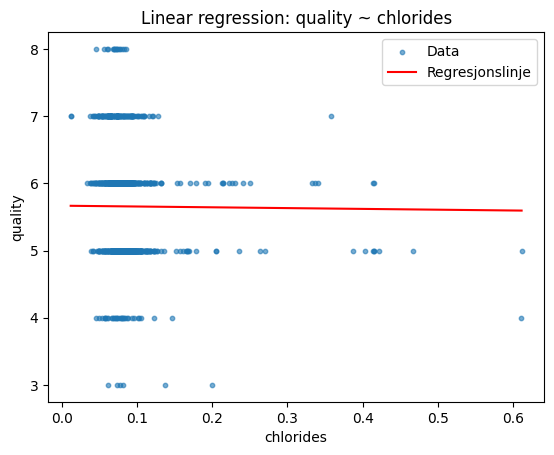

In [10]:

# --- Hjelpefunksjoner ---
def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

def gradient_descent(X, y, alpha=0.01, n_iter=10000):
    m, n = X.shape
    theta = np.zeros(n)
    for i in range(n_iter):
        preds = X @ theta
        grad = (1/m) * (X.T @ (preds - y))
        theta -= alpha * grad
    return theta

# --- Data ---
y = df["quality"].values.astype(float)
X_chlor = df[["chlorides"]].values.astype(float)
Xc = add_bias(X_chlor)

# --- Tren modell ---
theta_chlor = gradient_descent(Xc, y, alpha=0.01, n_iter=12000)

print("Intercept:", theta_chlor[0])
print("Koeffisient:", theta_chlor[1])

# --- Plott ---
plt.scatter(X_chlor, y, s=10, alpha=0.6, label="Data")
x_line = np.linspace(X_chlor.min(), X_chlor.max(), 100).reshape(-1,1)
X_line = add_bias(x_line)
y_line = X_line @ theta_chlor
plt.plot(x_line, y_line, color="red", label="Regresjonslinje")
plt.xlabel("chlorides"); plt.ylabel("quality")
plt.title("Linear regression: quality ~ chlorides")
plt.legend(); plt.show()


### Q1.3.2

In [11]:
def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

def gradient_descent(X, y, alpha=0.01, n_iter=10000):
    m, n = X.shape
    theta = np.zeros(n)
    for i in range(n_iter):
        preds = X @ theta
        grad = (1/m) * (X.T @ (preds - y))
        theta -= alpha * grad
    return theta

def run_simple_regression(feature_name, alpha=0.01, n_iter=12000):
    # Data
    y = df["quality"].values.astype(float)
    X = df[[feature_name]].values.astype(float)
    Xb = add_bias(X)
    
    # Tren modell
    theta = gradient_descent(Xb, y, alpha=alpha, n_iter=n_iter)
    
    # Print resultater
    print(f"=== {feature_name} ===")
    print("Intercept:", theta[0])
    print("Koeffisient:", theta[1])
    
    # Plott
    plt.scatter(X, y, s=10, alpha=0.6, label="Data")
    x_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
    X_line = add_bias(x_line)
    y_line = X_line @ theta
    plt.plot(x_line, y_line, color="red", label="Regresjonslinje")
    plt.xlabel(feature_name); plt.ylabel("quality")
    plt.title(f"Linear regression: quality ~ {feature_name}")
    plt.legend(); plt.show()
    
    return theta

=== chlorides ===
Intercept: 5.66699494467208
Koeffisient: -0.11891332962353725


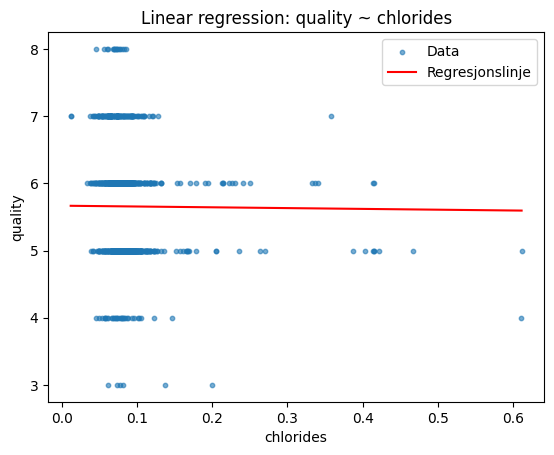

In [13]:
theta_chlor = run_simple_regression("chlorides")


### 1.3.2

=== alcohol ===
Intercept: 1.3676019466339988
Koeffisient: 0.41025947976436566


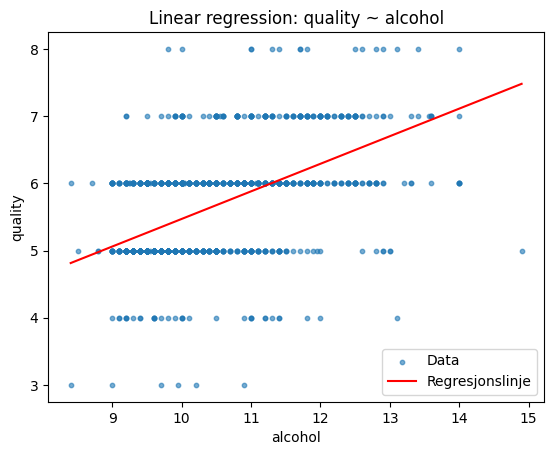

In [14]:
theta_alc   = run_simple_regression("alcohol")

### 1.3.3

look at the task above :)

### 1.3.4

Chlorides: The regression line fits poorly; the points are scattered with almost no clear trend.

Alcohol: The regression line fits much better; you can see an upward trend → higher alcohol content is associated with higher quality.

## 1.4 Train-Test Split

In [23]:
X = df[["alcohol"]].values  # eksempel med alcohol
y = df["quality"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (914, 1) Test: (229, 1)


In [24]:
from sklearn.model_selection import KFold

X = df[["alcohol"]].values
y = df["quality"].values
Xb = np.c_[np.ones((X.shape[0], 1)), X]  # legg til bias-kolonne

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(Xb), 1):
    X_train, X_test = Xb[train_idx], Xb[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    print(f"Fold {fold}: Train {X_train.shape}, Test {X_test.shape}")


Fold 1: Train (914, 2), Test (229, 2)
Fold 2: Train (914, 2), Test (229, 2)
Fold 3: Train (914, 2), Test (229, 2)
Fold 4: Train (915, 2), Test (228, 2)
Fold 5: Train (915, 2), Test (228, 2)


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

def gradient_descent(X, y, alpha=0.01, n_iter=10000):
    m, n = X.shape
    theta = np.zeros(n)
    for i in range(n_iter):
        preds = X @ theta
        grad = (1/m) * (X.T @ (preds - y))
        theta -= alpha * grad
    return theta

def evaluate_feature(df, feature, alpha=0.01, n_iter=12000, n_splits=5):
    """Trener og evaluerer lineær regresjon for valgt feature med KFold."""
    y = df["quality"].values.astype(float)
    X = df[[feature]].values.astype(float)
    Xb = add_bias(X)

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    mse_scores, rmse_scores, r2_scores = [], [], []

    print(f"\n=== Feature: {feature} ===")
    for fold, (train_idx, test_idx) in enumerate(kf.split(Xb), 1):
        X_train, X_test = Xb[train_idx], Xb[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        theta = gradient_descent(X_train, y_train, alpha=alpha, n_iter=n_iter)
        y_pred = X_test @ theta

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

        print(f"Fold {fold}: MSE={mse:.4f}, RMSE={rmse:.4f}, R²={r2:.4f}")

    print("\n--- Gjennomsnitt over 5 folds ---")
    print("MSE  : ", np.mean(mse_scores), "(Var:", np.var(mse_scores), ")")
    print("RMSE : ", np.mean(rmse_scores), "(Var:", np.var(rmse_scores), ")")
    print("R²   : ", np.mean(r2_scores),   "(Var:", np.var(r2_scores), ")")


### Q1.4.1

#### How well does alcohol alone predict wine quality in each split?


Alcohol shows a clear positive predictive power. In all folds the regression line trends upward, and R² values lie between ~0.19 and ~0.27, with an average of about 0.23. This means alcohol alone explains around 23% of the variation in wine quality. The errors (MSE ≈ 0.50, RMSE ≈ 0.71) are moderate and consistent across folds, showing a stable but limited model.

In [29]:
evaluate_feature(df, "alcohol")




=== Feature: alcohol ===
Fold 1: MSE=0.4241, RMSE=0.6512, R²=0.2379
Fold 2: MSE=0.5932, RMSE=0.7702, R²=0.1944
Fold 3: MSE=0.5171, RMSE=0.7191, R²=0.2370
Fold 4: MSE=0.4955, RMSE=0.7039, R²=0.2741
Fold 5: MSE=0.4687, RMSE=0.6846, R²=0.2032

--- Gjennomsnitt over 5 folds ---
MSE  :  0.49969940137977853 (Var: 0.0031493712028112025 )
RMSE :  0.705795935068879 (Var: 0.0015514994200251857 )
R²   :  0.22935020351984464 (Var: 0.0008078245884017785 )


### Q1.4.2

#### How well does chlorides alone predict wine quality in each split?


Chlorides perform extremely poorly. The regression line is almost flat, and R² values hover around zero (some even slightly negative). On average, R² ≈ 0.0001, which means chlorides explain virtually none of the variation in wine quality. The errors (MSE ≈ 0.65, RMSE ≈ 0.80) are higher than for alcohol, and the performance is consistently weak across all folds.

In [30]:
evaluate_feature(df, "chlorides")


=== Feature: chlorides ===
Fold 1: MSE=0.5558, RMSE=0.7455, R²=0.0012
Fold 2: MSE=0.7357, RMSE=0.8577, R²=0.0010
Fold 3: MSE=0.6778, RMSE=0.8233, R²=-0.0002
Fold 4: MSE=0.6817, RMSE=0.8257, R²=0.0013
Fold 5: MSE=0.5899, RMSE=0.7681, R²=-0.0029

--- Gjennomsnitt over 5 folds ---
MSE  :  0.6481776166151482 (Var: 0.004317463444518112 )
RMSE :  0.8040459489681966 (Var: 0.001687728562980351 )
R²   :  9.222953654415278e-05 (Var: 2.4731460780397357e-06 )


### Q1.4.3

#### Does the model underfit?


Yes. Both models underfit, because wine quality is influenced by many factors. Using only a single feature (alcohol or chlorides) cannot capture this complexity. Even alcohol, which is the stronger predictor, only reaches an average R² ≈ 0.23, meaning most of the variation in wine quality remains unexplained.

### Q1.4.4

#### Compare mean and variance of results


Alcohol gives lower average errors (MSE ≈ 0.50, RMSE ≈ 0.71) and higher average R² (≈ 0.23) compared to chlorides (MSE ≈ 0.65, RMSE ≈ 0.80, R² ≈ 0.0001). Variance across folds is very small for both features, showing stable results. However, alcohol consistently performs better, with both lower error and higher explanatory power.

## Q1.5 Multiple Linear Regression

### Q1.5.1


In [ ]:

# 1) Rydd evt. NaN i data
df_clean = df.dropna().copy()

# 2) Sett opp X (alle features) og y
feature_cols = [c for c in df_clean.columns if c != "quality"]
X_all = df_clean[feature_cols].values.astype(float)
y_all = df_clean["quality"].values.astype(float)

def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

def standardize_fit(X):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0, ddof=0)
    sigma[sigma == 0] = 1.0  # unngå deling på 0
    return mu, sigma

def standardize_apply(X, mu, sigma):
    return (X - mu) / sigma

def gradient_descent(X, y, alpha=0.005, n_iter=20000):
    m, n = X.shape
    theta = np.zeros(n)
    for i in range(n_iter):
        preds = X @ theta
        grad = (1/m) * (X.T @ (preds - y))
        theta -= alpha * grad
        # enkel sikkerhet: bryt hvis noe blir NaN
        if np.isnan(theta).any():
            raise ValueError("NaN i theta – senk alpha eller sjekk skalering.")
    return theta

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores, rmse_scores, r2_scores = [], [], []

fold = 1
for train_idx, test_idx in kf.split(X_all):
    X_tr_raw, X_te_raw = X_all[train_idx], X_all[test_idx]
    y_tr, y_te = y_all[train_idx], y_all[test_idx]

    # 3) Standardiser pr. fold (fit på train, apply på både train/test)
    mu, sigma = standardize_fit(X_tr_raw)
    X_tr = standardize_apply(X_tr_raw, mu, sigma)
    X_te = standardize_apply(X_te_raw, mu, sigma)

    # 4) Legg til bias
    X_tr_b = add_bias(X_tr)
    X_te_b = add_bias(X_te)

    # 5) Tren med trygg alpha
    theta = gradient_descent(X_tr_b, y_tr, alpha=0.005, n_iter=20000)

    # 6) Evaluer på test
    y_pred = X_te_b @ theta
    mse = mean_squared_error(y_te, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_te, y_pred)

    mse_scores.append(mse); rmse_scores.append(rmse); r2_scores.append(r2)
    print(f"Fold {fold}: MSE={mse:.4f}, RMSE={rmse:.4f}, R²={r2:.4f}")
    fold += 1

print("\n--- Gjennomsnitt (Multiple LR) ---")
print(f"MSE  : {np.mean(mse_scores):.4f}  (Var: {np.var(mse_scores, ddof=1):.6f})")
print(f"RMSE : {np.mean(rmse_scores):.4f}  (Var: {np.var(rmse_scores, ddof=1):.6f})")
print(f"R²   : {np.mean(r2_scores):.4f}  (Var: {np.var(r2_scores, ddof=1):.6f})")


Fold 1: MSE=0.3824, RMSE=0.6184, R²=0.3128
Fold 2: MSE=0.4836, RMSE=0.6954, R²=0.3434
Fold 3: MSE=0.4320, RMSE=0.6573, R²=0.3625
Fold 4: MSE=0.4095, RMSE=0.6400, R²=0.4000
Fold 5: MSE=0.3776, RMSE=0.6145, R²=0.3580

--- Gjennomsnitt (Multiple LR) ---
MSE  : 0.4170  (Var: 0.001864)
RMSE : 0.6451  (Var: 0.001088)
R²   : 0.3553  (Var: 0.001002)


### Q1.5.2

#### Compare the results of simple vs multiple regression in terms of MSE, RMSE, and R²

The simple linear regression with alcohol as the only predictor achieved an average MSE of about 0.50, RMSE ≈ 0.71, and R² ≈ 0.23. Using chlorides alone performed very poorly, with an average MSE ≈ 0.65, RMSE ≈ 0.80, and R² ≈ 0.00.

In contrast, the multiple linear regression model using all features achieved better results: average MSE ≈ 0.42, RMSE ≈ 0.65, and R² ≈ 0.36 across the 5 folds.

This shows that multiple regression clearly outperforms simple regression. It reduces error (lower MSE and RMSE) and explains a larger proportion of the variance in wine quality (higher R²). The improvement is especially clear compared to chlorides, but even alcohol alone is not as strong as using all features together.

### Q1.5.3


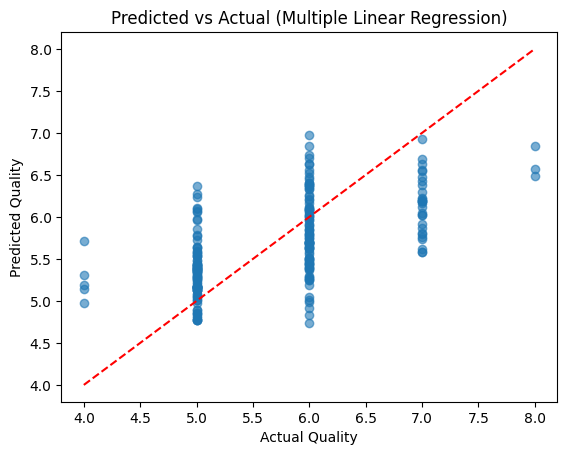

In [33]:

plt.scatter(y_te, y_pred, alpha=0.6)
plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], "r--")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Predicted vs Actual (Multiple Linear Regression)")
plt.show()


### Q1.5.4

#### Which model performs better and why?

The multiple linear regression model performs better than the simple regression models. While alcohol alone explains around 23% of the variation in wine quality, and chlorides explain virtually none, the multiple regression model using all features explains about 36%. It also achieves lower error values (MSE and RMSE).

The improvement comes from combining information from all predictors, which captures more of the complex relationships that determine wine quality. In other words, wine quality depends on multiple chemical properties, not just a single one, and the multiple regression model reflects this complexity more effectively.

## Exercise-2